In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
#drive.mount('/content/drive')

import pandas as pd

# Replace data.csv with your own file name
#df = pd.read_csv('/content/drive/MyDrive/Fys2150/Lab 6 - Magnetisme/faraday.csv')


In [2]:
#print(df)
#Prelab opg 7 - Du måler lengden av  flintglasset som lyset går gjennom til a være L = 30 +- 0.1 mm
#Regn ut Verdet-konstanten med tilhørende usikkerhet.

#Hva finner du? (Du kan anta at usikkerheten i målingene av B er neglisjerbar og at verdiene til B er midlet over  flintglasset.)
#B = df['B'].to_numpy()
#theta = df['theta'].to_numpy()

#\theta =V(lambda)*B*L , 4.3 Magnetisk hysterese
L = 30/1000 # lengde, m

def Verdet(theta, B):
  #𝑉 Verdet-konstanten, som er uavhengig av 𝐿 og 𝐵. 𝑉 kan imidlertid være en meget ulineær funksjon
  #av 𝜆, og er derfor bare en ”konstant” for en enkelt bølgelengde.
  return theta/(B*L)

#verdet_values = (Verdet(theta, B))

#avg_V = np.mean(verdet_values)


#print(avg_V) #får ikke noe som oppgitt i opg


**Hysteresis Loop (B-H)** https://cdn1.byjus.com/wp-content/uploads/2021/04/Hysteresis.png

 - Transformer, great loss of energy. Connected to AC power supply. Important when selecting a material. Choose material with low Retentiuity (magnetix flux level in material as we decrese magnetic field to 0)


**Magnetisk susceptibilitet**, representert med symbolet X, er et mål på hvor mye et materiale blir magnetisert når det utsettes for et eksternt magnetfelt.

### B- vs H-felt:
B-feltet, også kjent som magnetisk flukstetthet eller magnetisk induksjon, er en kvantifisering av styrke og retning av det magnetiske feltet i et punkt i rommet. Det representerer den totale magnetiske effekten inkludert eksterne kilder til magnetfelt samt bidrag fra eventuelle magnetiske materialer som er til stede, i form av deres egen magnetisering. Enheten for B-feltet er Tesla (T) eller Gauss (G, ikke-SI-enhet), og det kan måles med instrumenter som en Hall-probe.

H-feltet, også kjent som det magnetiske feltet, magnetfeltstyrke, eller magnetiserende felt, er et mål på den eksterne kraften som påføres et magnetisk materiale for å skape magnetisering. H-feltet symboliserer således kun påvirkningen fra eksterne kilder uten å ta inn over seg materialeegenskaper. H-feltet måles i ampere per meter (A/m) og er uavhengig av materialet som feltet påvirker.

Den fundamentale forskjellen mellom de to feltene er at B-feltet inkluderer bidraget fra materialets magnetisering, noe som gjør at det er avhengig av mediumet feltet opererer i, mens H-feltet bare representerer den ytre pådrivingen og er uavhengig av mediumet.

Forholdet mellom B og H kan bli beskrevet ved:

[ B = u0(H + M) ]

I et para- eller ferromagnetisk materiale er imidlertid ikke feltene lenger proporsjonale, men gitt av:

[ H = B/u0 - M ]


### Diamagnetisme
Diamagnetisme er en svak form for magnetisme som forekommer i alle materialer og er karakterisert ved at det induserer en magnetisering motsatt retningen av et eksternt påført magnetfelt. Hovedtrekkene ved diamagnetisme er som følger:

Negativ magnetisk susceptibilitet: Diamagnetiske materialer skaper en svak magnetisering i motsatt retning av det påførte magnetfeltet.

- Temperaturuavhengig: Diamagnetisk respons endres ikke betydelig med temperaturendringer.

- Universell: Til stede i alle materialer, men effekten er vanligvis svært svak og ofte overskygget av sterkere magnetiske effekter.

- Diamagnetiske materialer: Inkluderer ting som vann, grafitt, og edle gasser, som alle har en veldig liten og negativ magnetisk susceptibilitet.

- Diamagnetisme er grunnleggende sett et resultat av elektronenes respons på eksterne magnetfelt og kan føre til fenomener som magnetisk levitasjon i visse forhold.


### Para/ferro-magnetisme
Paramagnetiske materialer får kun en
magnetisering når de plasseres i et ytre magnetfelt.
De magnetiske dipolene vil minimere sin
potensielle energi, og retter seg etter det påtrykte
feltet. Når feltet tas bort vil termiske effekter føre
til at dipolene igjen får en tilfeldig orientering. I et
paramagnetisk materiale er magnetiseringen
omtrent proporsjonal med styrken på det påtrykte
magnetfeltet H. Vi skriver derfor ofte M = χH, hvor
den magnetiske susceptibiliteten 𝜒 kan ses på som
en materialkonstant. I paramagnetiske materialer er
0 < 𝜒 << 1. Et paramagnetisk materiale fungerer
altså som en svak magnetfeltforsterker.

Et ferromagnetisk materiale vil oppføre seg på
tilsvarende måte som et paramagnetisk materiale i
et magnetfelt, men magnetiseringen er vesentlig
større.



In [3]:
#Pre-Lab opg 6 D_paralell og D_90 i en rotasjonssymmetrisk ellipsoide (se labteksten for definisjoner).
#Sammenlign resultatene med figur 5 og sjekk at de stemmer for f>0 og spesielt for kulen (f = 1).

#Bruk programmet til å beregne D|| og D for en rotasjonsellipsoide med symmetriakse a|| = 20 cm og akse a= 2 cm.

# akse-lengdene (se figur 4)
a_para = 0.2
a_90 = 0.02

def D_para(f):
  if f > 1:
    return 1/(1-f**2) * (1 - f/np.sqrt(f**2-1) * np.log(f+np.sqrt(f**2-1)))
  elif f == 1:
    return 1/3
  elif f < 1 and f > 0:
    return 1/(1-f**2) * (1 - f/np.sqrt(1-f**2)*np.arccos(f))
  else:
    raise Exception("Please input a number f.")


f_val = a_para/a_90
f = f_val
eps = np.sqrt(1-1/f**2) #Vi velger å bruke ellipsoidens eksentrisitet 𝜀

z = f + np.sqrt(f**2-1)

def D_90(f):
  return (1-D_para(f))/2

d_par = D_para(f_val)
print(f"Val D_para: {d_par:.4f}")



Val D_para: 0.0203


# Lab 6 - Magnetisme

### Eksperiment 1: Diamagnetisme

I dette eksperimentet skal du måle den magnetiske susceptibiliteten til vismut - et materialet kjent for å være sterkt diamagnetisk. Prosessen innebærer det å plassere en vismutstang i et inhomogent magnetfelt og måle den magnetiske kraften som virker på stangen. Denne kraften motvirker tyngdekraften og kan måles ved hjelp av en vekt.


#### Eksperimentelt:

- Måler diameter til stav
- Ha enden så midt i mulig inni gapet, slik at den dyttet vertikalt opp. Ikke vinkel
- Litt asymmetrisk fested tråd på staven
- For måling B1 lar vi den flate siden vende mot spolen.
- Feil: plassering i magnetfeltet.




areal til vismutstav: 0.84cm^2
Average fra formel: -1.57e-04
Magnetisk susceptibilitet: -1.48e-04 +- -3.42e-06
Easily get less than theoretical due to tape and placment of rod etc.
Magnetisk susceptibilitet ved antatt lineært forhold mellom Fz og B1: -1.27e-04 +- -7.91e-06
Forhold mellom lineært og ikke lineært (lin/ikke-lin): 0.86
Forhold mellom usikkerhet lineært og ikke lineært (lin/ikke-lin): 2.3

Fz-values:
0.0e+00
0.0e+00
0.0e+00
3.9e-04
6.9e-04
1.1e-03
1.3e-03
1.6e-03
2.0e-03
2.3e-03
2.7e-03
2.8e-03
3.1e-03





C:\Users\Elias\AppData\Local\Temp\ipykernel_32424\498909380.py:11: RuntimeWarning: divide by zero encountered in true_divide
  return (-1/(Fz*2*u0)*A*(B1**2-B2**2))**-1


'\nAnta en lineær sammenheng mellom 𝐹𝑧 og 𝐵1: Se hva som ville skjedd om du ikke hadde brukt et kvadratledd i\ntilpasningen din, men antatt en lineær sammenheng mellom 𝐹z og 𝐵1.\nDu kan sammenligne kvaliteten på tilpasningene ved å bruke statistiske metoder som korrelasjon, regresjonsanalyse osv.\n'

<Figure size 640x480 with 0 Axes>

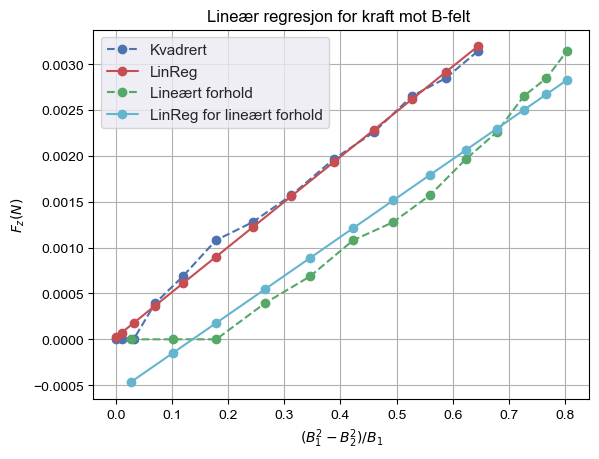

In [4]:
#Eksperiment 1: Diamagnetisme


# Fz = - X /(2*u0) * A(B1**2-B2**2)
# A, tverrsnitt. B1 og B2 er x-komponenten i B-feltet i to endene av stangen.
u0 = 1.25663706212e-6 # vacuum permeability
g = 9.819 # Oslo, tyngdeakselerasjon

#1.6e-4, skal få for susc
def X_func(Fz, A, B1, B2):
  return (-1/(Fz*2*u0)*A*(B1**2-B2**2))**-1

A = np.array([1.0, 1.05, 1.05])/100 #tverrsnitt til vismut-stangen, flere målinger. Har teip på seg, X vil egentlig være litt mindre.
A = (np.average(A)/2)**2*np.pi
print(f"areal til vismutstav: {A*10000:.2f}cm^2")

I = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4]) # 0 -> 2.4 A, stepsize 0.2

B2 = np.array([0.6, 1.0, 1.0, 1.3, 1.5, 1.7, 1.8, 1.8, 1.8, 1.8, 1.8, 1.7, 1.7 ])/1000  #Tesla, Bx, topp
vekt = np.array([0.0, 0.0, 0.0, 0.04, 0.07, 0.11, 0.13, 0.16, 0.20, 0.23, 0.27, 0.29, 0.32])/1000 # kg, vekt vist på Highland, HCB602H.

B1 = np.array([26.6, 102.7, 179.1, 265.4, 346.1, 422.5, 493.5, 559.1, 622.8, 677.8, 725.9, 766.3, 802.6])/1000 #tesla  #Bx, bunn

Fz = vekt*g # deltaMass/g
X = X_func(Fz, A, B1, B2) # magnetiske susceptibiliteten 𝜒 til vismut


# Plot Fz(B1**2-B2**2)
y = Fz
x = (B1**2-B2**2)

fit = stats.linregress(x, y)
a = fit.slope #  - X / (2*u0)
b = fit.intercept
err = fit.stderr

X_vals = (X_func(Fz, A, B1, B2))
X_mean = np.sum(X_vals[3:])/ np.size(X_vals[3:]) #skipped over first 3

print(f"Average fra formel: {X_mean:.2e}")

X_ = -a*2*u0/A
dx = -err*2*u0/A

print(f'Magnetisk susceptibilitet: {X_:.2e} +- {dx:.2e}')
print(f'Easily get less than theoretical due to tape and placment of rod etc.')


#Anta lineær sammenheng mellom Fz og B1
y_lin = Fz
x_lin = B1
fit = stats.linregress(x_lin, y_lin)
a_lin = fit.slope #  - X / (2*u0)
b_lin = fit.intercept
err_lin = fit.stderr

X_lin = -a_lin*2*u0/A
dx_lin = -err_lin*2*u0/A
print(f'Magnetisk susceptibilitet ved antatt lineært forhold mellom Fz og B1: {X_lin:.2e} +- {dx_lin:.2e}')

print(f'Forhold mellom lineært og ikke lineært (lin/ikke-lin): {X_lin/X_:.2f}')

print(f'Forhold mellom usikkerhet lineært og ikke lineært (lin/ikke-lin): {dx_lin/dx:.1f}')

#Print Fz-values
print("\nFz-values:")
for fz in Fz:
  print(f"{fz:.1e}")
print("\n\n")

plt.figure()
plt.tight_layout()
fig, ax = plt.subplots()
sns.set_theme()
ax.plot(x, y, '--bo', label=f'Kvadrert')
ax.plot(x, a*x+b,  '-ro', label=f'LinReg')
ax.plot(x_lin, y_lin, '--go', label=f'Lineært forhold')
ax.plot(x_lin, a_lin*x_lin+b_lin,  '-co', label=f'LinReg for lineært forhold')
ax.set_title("Lineær regresjon for kraft mot B-felt ")
ax.set_xlabel(r"$(B_1^2 - B_2^2) / B_1$")
ax.set_ylabel(r"$F_z (N)$")
ax.grid(visible= True)
ax.legend(loc="best")
#plt.savefig("Opg1_suscept.png")
#Gjør en vurdering av om B2 det er viktig å ta med målingene av 𝐵2, eller om du kan anta at 𝐵2 = 0 med god tilnærming.
"""
Anta en lineær sammenheng mellom 𝐹𝑧 og 𝐵1: Se hva som ville skjedd om du ikke hadde brukt et kvadratledd i
tilpasningen din, men antatt en lineær sammenheng mellom 𝐹z og 𝐵1.
Du kan sammenligne kvaliteten på tilpasningene ved å bruke statistiske metoder som korrelasjon, regresjonsanalyse osv.
"""

### Eksperiment 2: Ferromagnetisme


I eksperiment 2 og 3 skal dere undersøke de ferromagnetiske egenskapene til jern med to ulike metoder.
Først skal dere måle den magnetiske flukstettheten med en Hall-sensor. Dere har tilgjengelig en stor spole
og en strømkilde. Disse brukes til å generere et tilnærmet homogent magnetfelt inne i spolen (figur 9).
Videre har dere fått utdelt fire jernobjekter med ulik geometri: en kort stang, en kule, en skive og et spyd
(land strukket ellipsoide).

#### Eksperimentelt:
- Måler dimensjoner til objekter og diameter til hovedsylinder


In [5]:
def f(a_para, a_90):
  return a_para/a_90

def B(N, I ,L):
  return u0*N*I/L

def B_tips(N, I, L, d):
  return u0*N*I/L*1/np.sqrt(1+(d/L)**2)
# Sett I = 5 A

#Sjekk om styrken på magnetfeltet inne i spolen stemmer med teorien (Oppgave 3 i prelabben), B = u0NI/L

# 1. Sjekk homogenitet av magnetfeltet:
# Dette kan gjøres ved å flytte Hall-sonden til forskjellige steder innenfor spolen mens du observerer målingene på sensorutlesningen.
# Hvis du får samme verdi for B-feltet på forskjellige steder inne i spolen, er feltet homogent. Hvis ikke, er det inhomogent.
# Målinger ulike steder i feltet: nesten øverst ca 3.2 mT. Midten 5.05. Litt lengre ned 4.52. Midten 4.8 -> 5.2.


# 2. Undersøk innflytelsen av plasseringsutstyr:
#  Du kan gjøre dette ved å ta en måling av magnetfeltet med og uten utstyret på plass og sammenligne verdiene
# Måler uten i midten til: 5.13. Plasserer utstyr -> 5.07 mT.

d = 80.00/1000 # diameter til sylinder
I = 5 #5 amper
N = 244 # vindinger
L = 275/1000 # lengde til sylinder
# Mål flukstetthet B_para og B_90

#Målet med digital skyvelære, Cocraft

B_calc = B(N, I, L)
print(f"Kalkulert felt: {B_calc*1000:.2f} mT")
B_calc2 = B_tips(N, I, L,d)
print(f"Kalkulert felt, nr 2: {B_calc2*1000:.2f} mT")

#Uten noen objekter
B = np.array([5.07, 5.15, 5.08, 5.11]) #mT

#Skive
d_ = 59.90/1000 #diameter
l_ = 6.91/1000 #tykkelse
a_para_skive = l_
a_90_skive = d_
B_para_skive = np.array([5.77, 5.75, 5.76])
B_90_skive = np.array([17.40, 17.37, 17.35, 17.32])
f_skive = f(a_para_skive, a_90_skive)

#Kule
# Kulen er magnetisert, så finner punkt med minst B
d_ = 63.51/1000 #dia
a_para_kule = d_
a_90_kule = d_
B_para_kule = np.array([12.06, 12.07, 12.06])
B_90_kule = B_para_kule
f_kule = f(a_para_kule, a_90_kule)

#Stang
d_ = 9.97/1000 # diameter
l_ = 64.60/1000 #lengde
a_para_stang = l_
a_90_stang = d_
B_para_stang = np.array([20.52, 20.50, 20.48])
B_90_stang = np.array([7.40, 7.57, 7.48])
f_stang = f(a_para_stang, a_90_stang)

#Spydet
d_ = 10.04/1000 # diameter, mm
l_ = 20.8/100 #målet med tommestokk, 0 ledd, cm
a_para_spyd = l_
a_90_spyd = d_
B_para_spyd = np.array([55.22, 55.32, 55.20, 55.41])
B_90_spyd = np.array([0]) #spyd for langt til å lagt ned
f_spyd = f(a_para_spyd, a_90_spyd)


print(f"Skive , D_para: {D_para(f_skive):.2f}, D_90: {D_90(f_skive):.2f}, dia: {a_para_skive*1000} mm, len: {a_90_skive*1000} mm, B_para: {np.average(B_para_skive):.2f} mT, B_90: {np.average(B_90_skive):.2f} mT ")
print(f"Kule , D_para=D_90: {D_para(f_kule):.2f}, D_90: {D_90(f_kule):.2f}, dia: {a_para_kule*1000} mm, len: {a_90_kule*1000} mm, B_para: {np.average(B_para_kule):.2f} mT, B_90: {np.average(B_90_kule):.2f} mT")
print(f"Stang , D_para: {D_para(f_stang):.4f}, D_90: {D_90(f_stang):.2f}, dia: {a_para_stang*1000} mm, len: {a_90_stang*1000} mm, B_para: {np.average(B_para_stang):.2f} mT, B_90: {np.average(B_90_stang):.2f} mT")
print(f"Spyd , D_para: {D_para(f_spyd):.3f}, D_90: {D_90(f_spyd):.3f}, dia: {a_para_spyd*100} mm, len: {a_90_spyd*1000} mm, B_para: {np.average(B_para_spyd):.2f} mT, B_90: {np.average(B_90_spyd):.2f} mT")


print(f"\nSkive , D_para: 1 , D_90: 0")
print(f"Kule , D_para=D_90: 0.33")
print(f"Stang , D_para: 0.2 , D_90: 0.4")
print(f"Spyd , D_para: 0, D_90: 0.5")

# B = u0NI/L teoretisk verdi
print(f'\nMålte B ca rundt 5.05-5.2. Teoretisk verdi: {B_tips(N, I, L, d)*1000:.2f} mT')


Kalkulert felt: 5.57 mT
Kalkulert felt, nr 2: 5.35 mT
Skive , D_para: 0.84, D_90: 0.08, dia: 6.91 mm, len: 59.9 mm, B_para: 5.76 mT, B_90: 17.36 mT 
Kule , D_para=D_90: 0.33, D_90: 0.33, dia: 63.51 mm, len: 63.51 mm, B_para: 12.06 mT, B_90: 12.06 mT
Stang , D_para: 0.0387, D_90: 0.48, dia: 64.6 mm, len: 9.97 mm, B_para: 20.50 mT, B_90: 7.48 mT
Spyd , D_para: 0.006, D_90: 0.497, dia: 20.8 mm, len: 10.04 mm, B_para: 55.29 mT, B_90: 0.00 mT

Skive , D_para: 1 , D_90: 0
Kule , D_para=D_90: 0.33
Stang , D_para: 0.2 , D_90: 0.4
Spyd , D_para: 0, D_90: 0.5

Målte B ca rundt 5.05-5.2. Teoretisk verdi: 5.35 mT


### Eksperiment 3: Ferromagnetisme-Hysterese

#### Eksperimentelt

- Laster inn script fra canvas, Hysteres.cap
- Coordinates verktøy i graf for å avlese punkter
- Leser av I1, A1 (nederst til venstre) og I2, A2 (øverst til høyre)
- Regulerer ved Amplitude knob, opp til 1V.
- Skru av etter hver måling.
- Kurven ikke helt symmetrisk rundt y-asken. (middelverdi til I)

##### Diskusjon
- M dominerer for B-feltet
- Magnetisering henger lenge igjen, større ved høyere I.
- Regnet ut B og M



<Figure size 640x480 with 0 Axes>

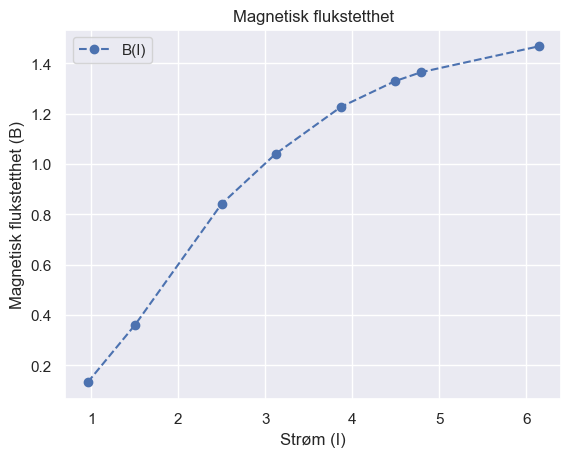

<Figure size 640x480 with 0 Axes>

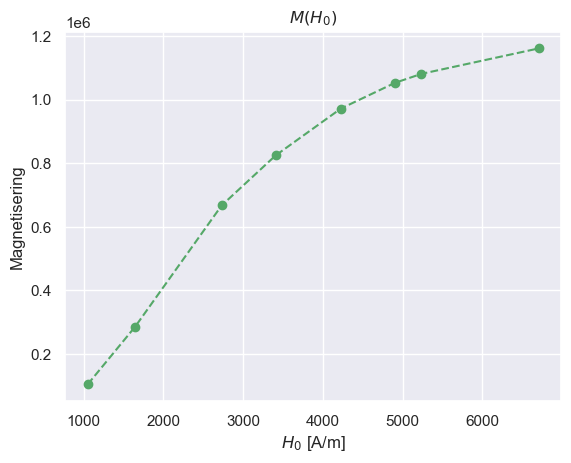

In [6]:
def B(S1, S2):
  return k*D*(S2-S1)/(2*n*A)

def I(I1, I2):
  return (np.abs(I1) +np.abs(I2))/2

# Vekselstrømgenerator, spole og en 0.25 ohm motstand i serie.
# Pascosensor kobles over motstanden og måler spenningen for å beregne strøm i spolen

# H0 = N*I/L
# bruk I <= 4*A

# kappa = k*D
# deltaS = 1/kappa * integral(eps dt)
#  B = kappa*deltaS/(n*A)
L = 315/1000 # lengde til spolen
N = 344 # vindinger hovedspole
n = 130 #antall viklinger 𝑛 på sekundærspolen
two_r = 6.5/1000 # diameter til sekundærspolen
A = np.pi*(two_r/2)**2
k = 10 #  kalibreringsfaktor oppgitt på instrumentet
D = 1.01e-6 # Wb # dempningsfaktoren, som kontrollerer følsomheten og innstilles på integratoren.
kappa = k*D

V = np.array([0.15, 0.25, 0.40, 0.50, 0.64, 0.75, 0.80, 1]) # 0.15V -> 1V, 8 målinger
I1 = np.array([-0.75, -1.30, -2.26, -2.88,  -3.63, -4.25, -4.52, -5.90]) #nederst, A
S1 = np.array([-210.58, -5.14, -606.06, -256.81, -15.41, -1129.94, -25.68, -575.24]) #

I2 = np.array([1.17, 1.71, 2.74, 3.36, 4.11, 4.73, 5.07, 6.38]) #øverst
S2 = np.array([-97.59, 303.03, 112.99, 631.74, 1032.36, 5.14, 1140.22, 677.97])

I = I(I1, I2)
B = B(S1, S2)

plt.figure()
fig, ax = plt.subplots()
sns.set_theme()
ax.plot(I, B, '--bo', label="B(I)")
ax.set_title("Magnetisk flukstetthet")
ax.set_xlabel("Strøm (I)")
ax.set_ylabel("Magnetisk flukstetthet (B)")
ax.grid(visible= True)
ax.legend(loc="best")


# Beregn H0
#H0 = N*I/L
H0 = N*I/L
#M = X/u0 * B
M = B/u0 - H0

plt.figure()
fig, ax = plt.subplots()
sns.set_theme()
ax.plot(H0, M, '--go')
ax.set_title(r"$M(H_0)$")
ax.set_xlabel(r"$H_0$ [A/m]")
ax.set_ylabel("Magnetisering")
ax.grid(visible= True)




### Eksperiment 4: Faraday-effekten

#### Eksperimentalt
- Finn vinkel som gir minst lys ved gitt strøm for 2 ulike filter
-
- Usikkerheter kommer fra lineær regresjon
- Vanskelig å lese av minst belysning


#### Analyse:

<Figure size 640x480 with 0 Axes>

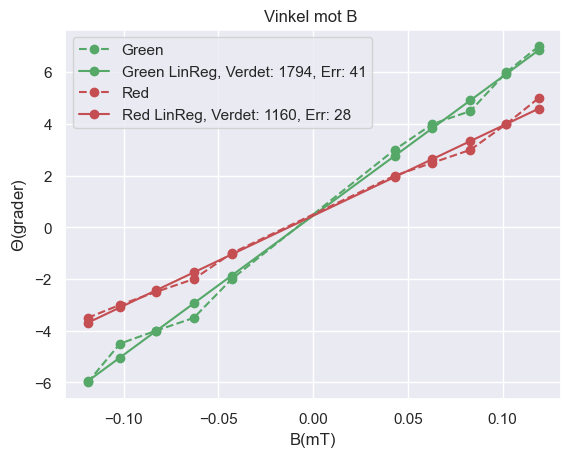

In [7]:
#: Dere får utlevert tre optiske filtre som slipper gjennom lys med 𝜆 = 440, 525og 595 nm. Tar i bruk rødt og grønt (595 og 525)
#Bruk disse til å generere tilnærmet monokromatisk lys. Videre har dere to lineære polarisasjonsfiltre

L = 30/1000 # lengden til flinstaven
I_neg = np.array([-3, -2.5, -2, -1.5, -1])
I_pos = np.array([1, 1.5, 2, 2.5, 3])

#Oppgitt verdier
B = np.array([-119, -102, -83, -63, -43, 43, 63, 83, 102, 119])/1000 # Tesla

#Rødt, 595 nm
theta_r = np.array([-3.5, -3.0, -2.5, -2, -1, 2, 2.5, 3, 4, 5]) # for I_neg, I_pos

# Grønn, 525 nm
theta_g = np.array([-6, -4.5, -4, -3.5, -2, 3, 4, 4.5, 6, 7])


#Fit data
fit_g = stats.linregress(B, theta_g)
a_g = fit_g.slope #Verdet
b_g = fit_g.intercept
err_g = fit_g.stderr

fit_r = stats.linregress(B, theta_r)
a_r = fit_r.slope #Verdet
b_r = fit_r.intercept
err_r = fit_r.stderr


plt.figure()
fig, ax = plt.subplots()
sns.set_theme()
ax.plot(B, theta_g, '--go', label='Green')
ax.plot(B, a_g*B+b_g,  '-go', label=f'Green LinReg, Verdet: {a_g/L:.0f}, Err: {err_g/L:.0f}')
ax.plot(B, theta_r, '--ro', label='Red')
ax.plot(B, a_r*B+b_r,  '-ro', label=f'Red LinReg, Verdet: {a_r/L:.0f}, Err: {err_r/L:.0f}')
ax.set_title("Vinkel mot B ")
ax.set_xlabel("B(mT)")
ax.set_ylabel(r"${\Theta}$(grader)")
ax.grid(visible= True)
ax.legend(loc="best")
